**Proyecto final análisis númerico**


Implementación y experimentación del método Newton-Homotopía 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=RuntimeWarning) 


Primer sistema a resolver con su respectivo Jacobiano.
$$
\begin{align*}
x_1^2 + x_2^2 - 10 &= 0,\\
x_1 - 3x_2 + 10 &= 0.
\end{align*}
$$

In [3]:
def F(x):
    x1,x2=x
    return np.array([x1**(2)+x2**(2)-10,
                    x1-3*x2+10])
def Fprime(x):
    x1, x2 = x
    Fprime = np.zeros((2, len(x)))
    Fprime[0][0] = 2*x1
    Fprime[0][1] =  2*x2
    Fprime[1][0] =  1
    Fprime[1][1] = -3
    return Fprime

Implementación método de Newton-Homotopia y Newton tradicional

In [4]:
def H(x, lambd, x0):
    return F(x) - (1 - lambd) * F(x0)


def derH(x):
    return Fprime(x)

def predict(lambd, lambd_prev, x0, x_init):
    delta_lambd = lambd - lambd_prev
    J = derH(x0)
    H1 = H(x0, lambd, x_init)
    H0 = H(x0, lambd_prev, x_init)
    xdot = -np.dot(np.linalg.inv(J), (H1 - H0) / delta_lambd)
    return delta_lambd, xdot

def correct(x1, lambd, x_init, tol, max_iter):
    H1 = H(x1, lambd, x_init)
    i = 0
    while np.linalg.norm(H1) > tol and i < max_iter:
        H1 = H(x1, lambd, x_init)
        J1 = derH(x1)
        d = -np.dot(np.linalg.inv(J1), H1)
        x1 = x1 + d
        i += 1
    return i, x1

def HomotopyMethod(x_ini, lambd_step=0.01, tol=1e-5, max_iter=1000):
    delta_lambd = lambd_step
    x0 = x_ini
    lambd_prev = 0
    lambd = lambd_prev
    resultado = {'lambda':[lambd], 'x':[x0]}
    k = 0
    while abs(lambd - 1) > np.finfo(float).eps:
        lambd = min(lambd_prev + delta_lambd, 1)
        delta_lambd, xdot = predict(lambd, lambd_prev, x0, x_init)
        x1 = x0 + delta_lambd * xdot
        i, x1 = correct(x1, lambd, x_init, tol, max_iter)
        if i == max_iter:
            delta_lambd /= 2
        else:
            delta_lambd = lambd_step
            x0 = x1
            lambd_prev = lambd
            k += 1
            resultado['x'].append(x1)
            resultado['lambda'].append(lambd)
            #print('Iteracion: {} \t \u03BB= {:.2f} \t x = {}'.format(k, lambd, x1))#Print del paso a paso
        if np.isnan(np.sum(x1)):
            print('Solucion no encontrada. Ingrese otro valor inicial  x.')
    if not np.isnan(np.sum(x1)):
        pass
    return resultado
def Newton_extendido(x,max_iterations):
    tol = 1*10**(-5)
    cont=0
    array_sol = [x]
    while 1:
        cont+=1
        F_v= F(x)
        DF_v= Fprime(x)
        new_x = x - np.dot(np.linalg.inv(DF_v),F_v)
        if F(new_x)[0] <= tol and F(new_x)[1] <= tol or cont >= max_iterations:
            break
        array_sol.append(new_x)
        x = new_x
    return new_x, np.array(array_sol)

Se resuelve el primer sistema con el punto inicial (-8,20). Se imprime el resultado final y las gráficas correspondientes.

Solucion por método de Newton:
[-1.00193405  2.99935532]
Solucion por método de homotopia:
-1.0009767620156031 2.9996744126614656


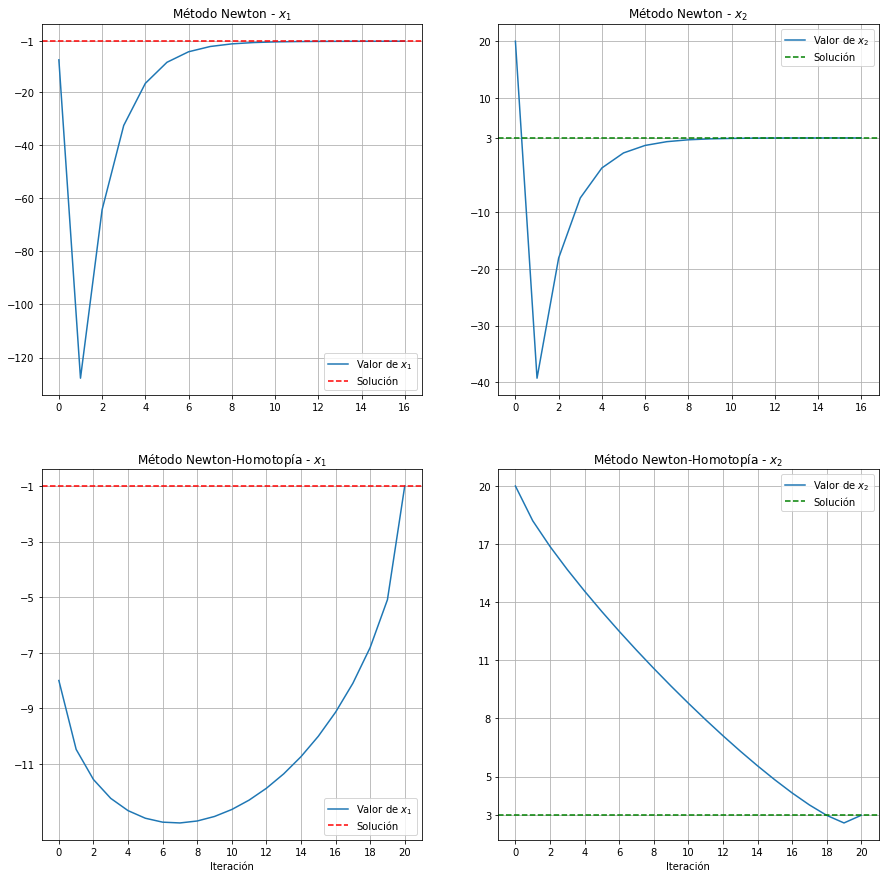

In [5]:
x_init = np.array([-8,20])
new_sol,new_sol_array = Newton_extendido(x_init, 10000)
print("Solucion por método de Newton:")
print(new_sol)
homotopy = HomotopyMethod(x_init, lambd_step= 0.05)
res_x1 = []
res_x2 = []
for i in range(len(homotopy["x"])):
    result = homotopy["x"][i]
    res_x1.append(result[0])
    res_x2.append(result[1])
print("Solucion por método de homotopia:")
print(res_x1[len(res_x1)-1], res_x2[len(res_x2)-1])

#Grafica del primer sistema
sol_x1 = round(res_x1[len(res_x1)-1])
sol_x2 = round(res_x2[len(res_x2)-1])
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(new_sol_array[:,0], label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.title("Método Newton - $x_1$")
plt.grid(1)
plt.yticks(np.array([-120,-100,-80,-60,-40,-20,-1]))
plt.legend()
plt.subplot(223)
plt.plot(res_x1, label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.yticks(np.array([-1,-3,-5,-7,-9,-11]))
plt.title("Método Newton-Homotopía - $x_1$")
plt.xlabel("Iteración")
plt.legend()
plt.subplot(222)
plt.plot(new_sol_array[:,1], label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.title("Método Newton - $x_2$")
plt.grid(1)
plt.yticks(np.array([-10,-20,-30,-40,3,10,20]))
plt.legend()
plt.subplot(224)
plt.plot(res_x2, label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.yticks(np.array([20,17,14,11,8,5,3]))
plt.title("Método Newton-Homotopía - $x_2$")
plt.xlabel("Iteración")
plt.legend()
plt.show()

Segundo sistema a solucionar

$$
\begin{align*}
3x_1 - x_2 +2 &= 0,\\
2x_1^2 - x_2 &= 0,
\end{align*}
$$

In [18]:
def F(x):
    x1,x2 = x
    return np.array([3*x1-x2+2,
                    2*x1**2-x2])
def Fprime(x):
    x1, x2 = x
    Fprime = np.zeros((2, len(x)))
    Fprime[0][0] = 3
    Fprime[0][1] =  -1
    Fprime[1][0] =  4*x1
    Fprime[1][1] = -1
    return Fprime

Solución del sistema iniciando el método en el punto $(10,-40)$

Solucion por método de Newton:
[2.00000007 8.00000021]
Solucion por método de homotopia:
2.0 8.0


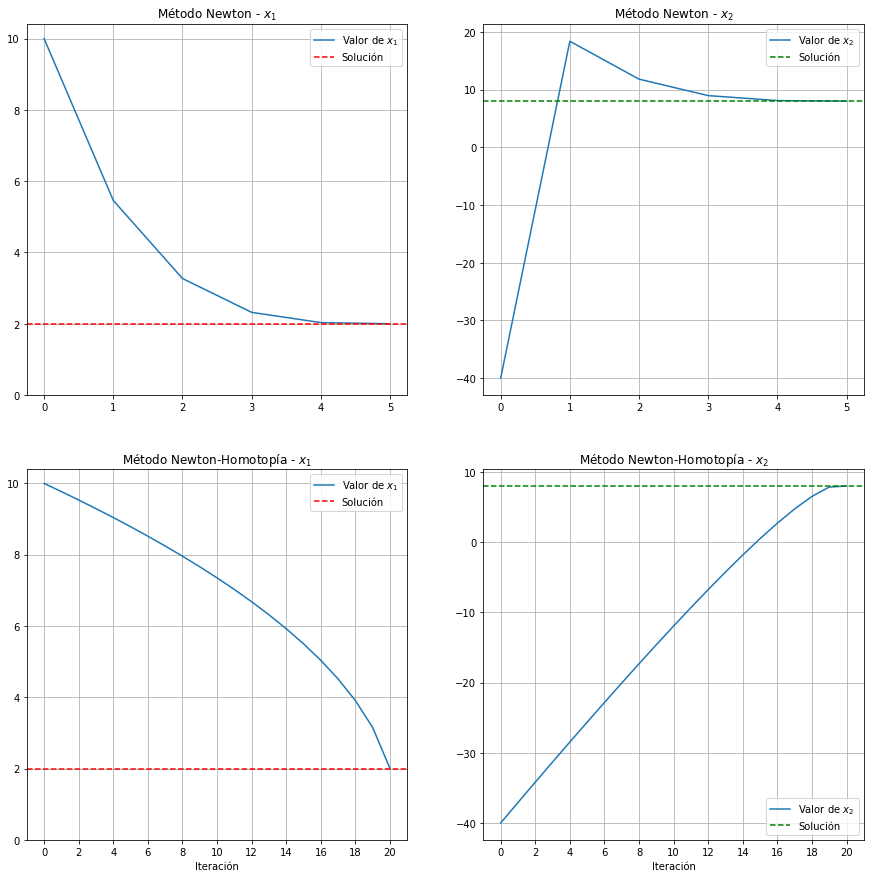

In [10]:
x_init = np.array([10,-40])
new_sol,new_sol_array = Newton_extendido(x_init, 10000)
print("Solucion por método de Newton:")
print(new_sol)
homotopy = HomotopyMethod(x_init, lambd_step= 0.05)
res_x1 = []
res_x2 = []
for i in range(len(homotopy["x"])):
    result = homotopy["x"][i]
    res_x1.append(result[0])
    res_x2.append(result[1])
print("Solucion por método de homotopia:")
print(res_x1[len(res_x1)-1], res_x2[len(res_x2)-1])

#Grafica segundo sistema-parte 1
sol_x1 = round(res_x1[len(res_x1)-1])
sol_x2 = round(res_x2[len(res_x2)-1])
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(new_sol_array[:,0], label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.title("Método Newton - $x_1$")
plt.grid(1)
plt.yticks(np.array([0,2,4,6,8,10]))
plt.legend()
plt.subplot(223)
plt.plot(res_x1, label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.yticks(np.array([0,2,4,6,8,10]))
plt.title("Método Newton-Homotopía - $x_1$")
plt.xlabel("Iteración")
plt.legend()
plt.subplot(222)
plt.plot(new_sol_array[:,1], label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.title("Método Newton - $x_2$")
plt.grid(1)
plt.yticks(np.array([-40,-30,-20,-10,0,10,20]))
plt.legend()
plt.subplot(224)
plt.plot(res_x2, label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.yticks(np.array([-40,-30,-20,-10,0,10]))
plt.title("Método Newton-Homotopía - $x_2$")
plt.xlabel("Iteración")
plt.legend()
plt.show()

Solución del sistema iniciando el método en el punto $(-5,15)$

Solucion por método de Newton:
[-0.50000181  0.49999457]
Solucion por método de homotopia:
-0.5000000000015425 0.4999999999953725


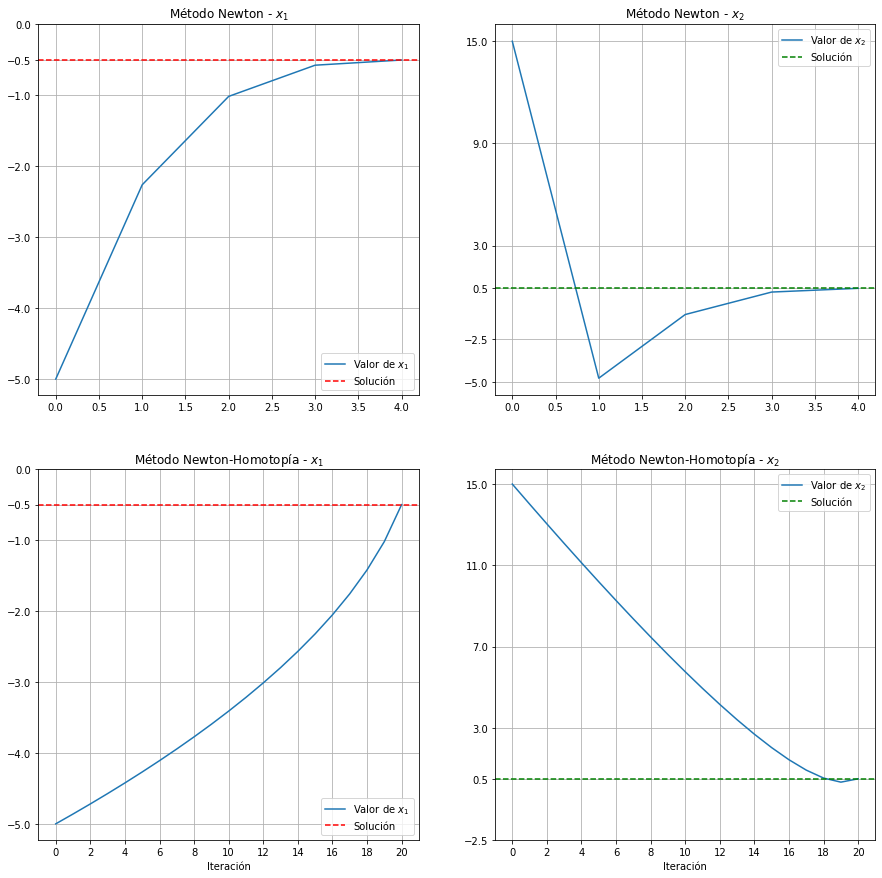

In [19]:
x_init = np.array([-5,15])
new_sol,new_sol_array = Newton_extendido(x_init, 10000)
print("Solucion por método de Newton:")
print(new_sol)
homotopy = HomotopyMethod(x_init, lambd_step= 0.05)
res_x1 = []
res_x2 = []
for i in range(len(homotopy["x"])):
    result = homotopy["x"][i]
    res_x1.append(result[0])
    res_x2.append(result[1])
print("Solucion por método de homotopia:")
print(res_x1[len(res_x1)-1], res_x2[len(res_x2)-1])
#Grafica segundo sistema-parte 2
sol_x1 = res_x1[len(res_x1)-1]
sol_x2 = res_x2[len(res_x2)-1]
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(new_sol_array[:,0], label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.title("Método Newton - $x_1$")
plt.grid(1)
plt.yticks(np.array([-5,-4,-3,-2,-1,-0.5,0]))
plt.legend()
plt.subplot(223)
plt.plot(res_x1, label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.yticks(np.array([-5,-4,-3,-2,-1,-0.5,0]))
plt.title("Método Newton-Homotopía - $x_1$")
plt.xlabel("Iteración")
plt.legend()
plt.subplot(222)
plt.plot(new_sol_array[:,1], label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.title("Método Newton - $x_2$")
plt.grid(1)
plt.yticks(np.array([15,9,3,0.5,-2.5,-5]))
plt.legend()
plt.subplot(224)
plt.plot(res_x2, label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.yticks(np.array([15,11,7,3,0.5,-2.5]))
plt.title("Método Newton-Homotopía - $x_2$")
plt.xlabel("Iteración")
plt.legend()
plt.show()

Tercer sistema a solucionar:
$$
\begin{align*}
\frac{\sqrt[3]{x_2}}{2 \sqrt{x_1}}  - \frac{1}{2} &= 0,\\
\frac{\sqrt{x_1}}{3\sqrt[3]{x_2^2}} - \frac{1}{3} &= 0.
\end{align*}
$$

In [20]:
def F(x):
    x1, x2 = x
    return np.array([1/2 * x2**(1/3) / x1**(1/2) - 1/2,
                     1/3 * x1**(1/2) / x2**(2/3) - 1/3])
def Fprime(x):
    x1, x2 = x
    Fprime = np.zeros((2, len(x)))
    Fprime[0][0] = -1/4 * x2**( 1/3) * x1**(-3/2)
    Fprime[0][1] =  1/6 * x1**(-1/2) * x2**(-2/3)
    Fprime[1][0] =  1/6 * x2**(-2/3) * x1**(-1/2)
    Fprime[1][1] = -2/9 * x1**( 1/2) * x2**(-5/3)
    return Fprime


Solución usando el punto inicial $(1.3,1.5)$

Solucion por método de Newton:
[0.99999996 0.9999999 ]
Solucion por método de homotopia:
0.9999999999999989 0.9999999999999978


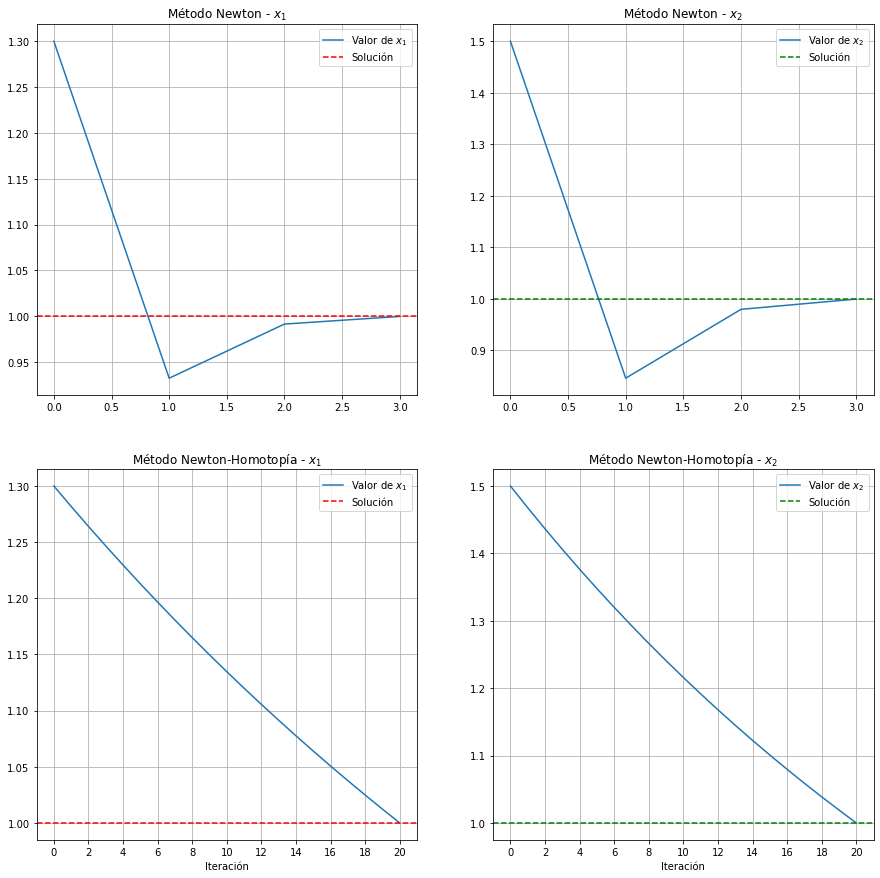

In [16]:
#Grafica tercer sistema
x_init = np.array([1.3,1.5])
new_sol,new_sol_array = Newton_extendido(x_init, 10000)
print("Solucion por método de Newton:")
print(new_sol)
homotopy = HomotopyMethod(x_init, lambd_step= 0.05)
res_x1 = []
res_x2 = []
for i in range(len(homotopy["x"])):
    result = homotopy["x"][i]
    res_x1.append(result[0])
    res_x2.append(result[1])
print("Solucion por método de homotopia:")
print(res_x1[len(res_x1)-1], res_x2[len(res_x2)-1])
sol_x1 = res_x1[len(res_x1)-1]
sol_x2 = res_x2[len(res_x2)-1]
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(new_sol_array[:,0], label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.title("Método Newton - $x_1$")
plt.grid(1)
#plt.yticks(np.array([-5,-4,-3,-2,-1,-0.5,0]))
plt.legend()
plt.subplot(223)
plt.plot(res_x1, label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
#plt.yticks(np.array([-5,-4,-3,-2,-1,-0.5,0]))
plt.title("Método Newton-Homotopía - $x_1$")
plt.xlabel("Iteración")
plt.legend()
plt.subplot(222)
plt.plot(new_sol_array[:,1], label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.title("Método Newton - $x_2$")
plt.grid(1)
#plt.yticks(np.array([15,9,3,0.5,-2.5,-5]))
plt.legend()
plt.subplot(224)
plt.plot(res_x2, label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
#plt.yticks(np.array([15,11,7,3,0.5,-2.5]))
plt.title("Método Newton-Homotopía - $x_2$")
plt.xlabel("Iteración")
plt.legend()
plt.show()

Solución usando el punto inicial $(3,2)$

Solucion por método de Newton:
[nan nan]
Solucion por método de homotopia:
0.9999999999976378 0.9999999999989622


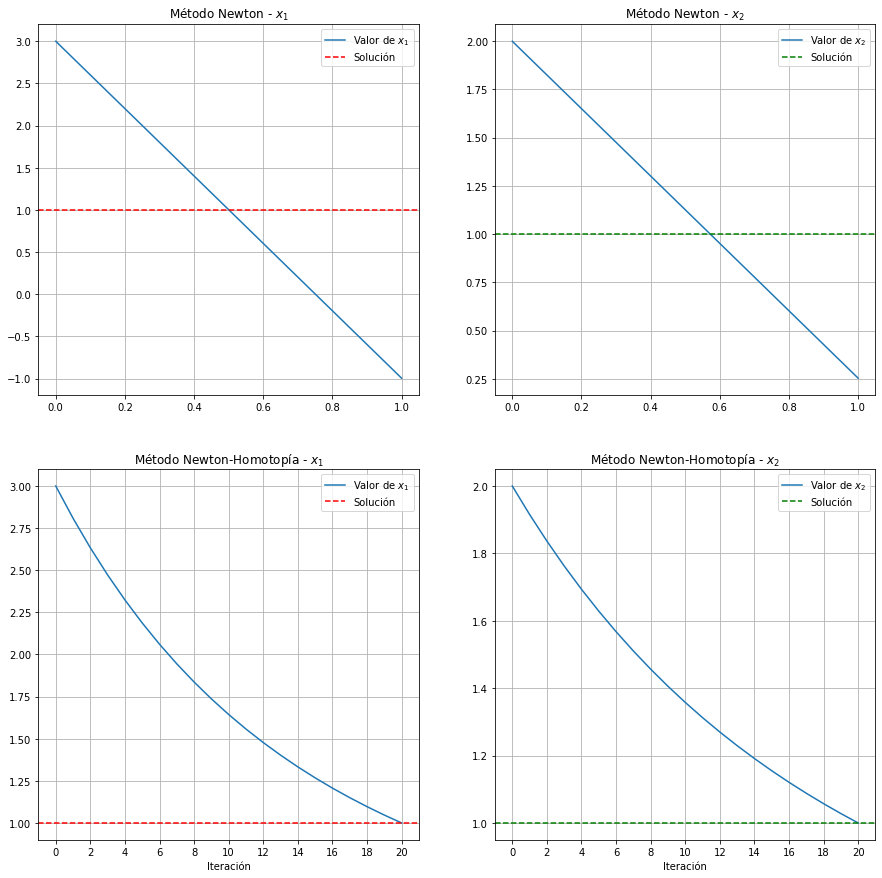

In [21]:
#Grafica tercer sistema
x_init = np.array([3,2])
new_sol,new_sol_array = Newton_extendido(x_init, 10000)
print("Solucion por método de Newton:")
print(new_sol)
homotopy = HomotopyMethod(x_init, lambd_step= 0.05)
res_x1 = []
res_x2 = []
for i in range(len(homotopy["x"])):
    result = homotopy["x"][i]
    res_x1.append(result[0])
    res_x2.append(result[1])
print("Solucion por método de homotopia:")
print(res_x1[len(res_x1)-1], res_x2[len(res_x2)-1])
sol_x1 = res_x1[len(res_x1)-1]
sol_x2 = res_x2[len(res_x2)-1]
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(new_sol_array[:,0], label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.title("Método Newton - $x_1$")
plt.grid(1)
plt.legend()
plt.subplot(223)
plt.plot(res_x1, label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.title("Método Newton-Homotopía - $x_1$")
plt.xlabel("Iteración")
plt.legend()
plt.subplot(222)
plt.plot(new_sol_array[:,1], label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.title("Método Newton - $x_2$")
plt.grid(1)
plt.legend()
plt.subplot(224)
plt.plot(res_x2, label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.title("Método Newton-Homotopía - $x_2$")
plt.xlabel("Iteración")
plt.legend()
plt.show()

Solución usando el punto inicial $(20,40)$

Solucion por método de Newton:
[nan nan]
Solucion por método de homotopia:
1.0000000000000002 1.0000000000000004


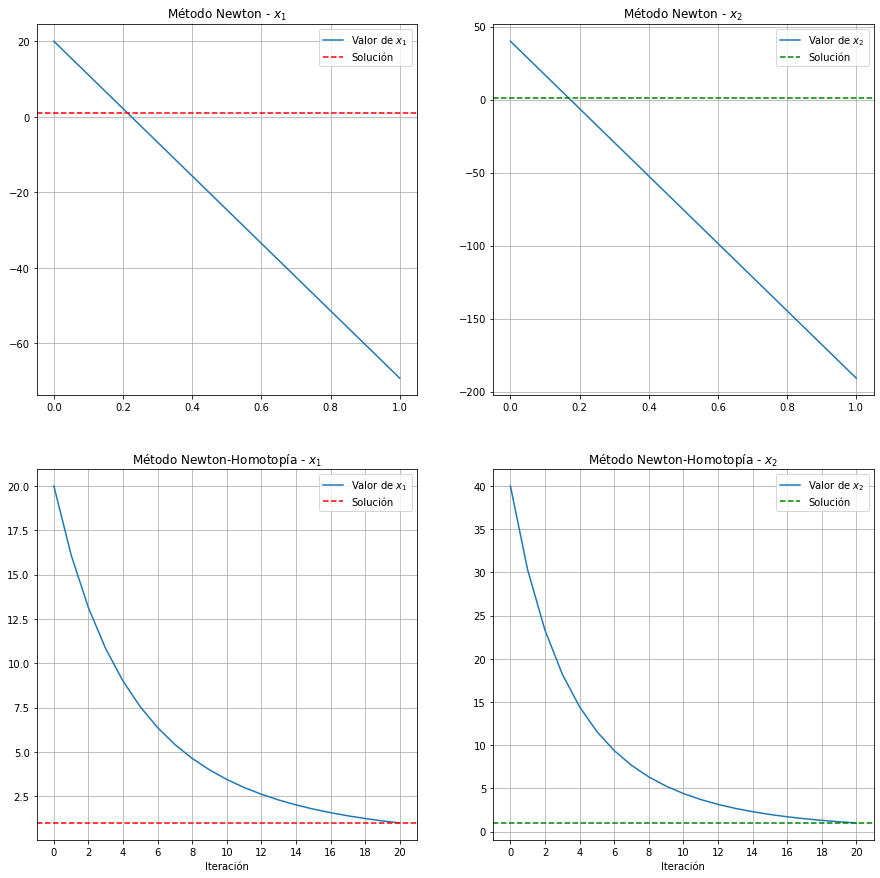

In [22]:
x_init = np.array([20,40])
new_sol,new_sol_array = Newton_extendido(x_init, 10000)
print("Solucion por método de Newton:")
print(new_sol)
homotopy = HomotopyMethod(x_init, lambd_step= 0.05)
res_x1 = []
res_x2 = []
for i in range(len(homotopy["x"])):
    result = homotopy["x"][i]
    res_x1.append(result[0])
    res_x2.append(result[1])
print("Solucion por método de homotopia:")
print(res_x1[len(res_x1)-1], res_x2[len(res_x2)-1])
sol_x1 = res_x1[len(res_x1)-1]
sol_x2 = res_x2[len(res_x2)-1]
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(new_sol_array[:,0], label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.title("Método Newton - $x_1$")
plt.grid(1)
plt.legend()
plt.subplot(223)
plt.plot(res_x1, label="Valor de $x_1$")
plt.axhline(y=sol_x1, xmin=0, xmax=20, color = "red",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.title("Método Newton-Homotopía - $x_1$")
plt.xlabel("Iteración")
plt.legend()
plt.subplot(222)
plt.plot(new_sol_array[:,1], label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.title("Método Newton - $x_2$")
plt.grid(1)
plt.legend()
plt.subplot(224)
plt.plot(res_x2, label="Valor de $x_2$")
plt.axhline(y=sol_x2, xmin=0, xmax=20, color = "green",linestyle='--', label="Solución")
plt.grid(1)
plt.xticks(np.arange(0, 22,2))
plt.title("Método Newton-Homotopía - $x_2$")
plt.xlabel("Iteración")
plt.legend()
plt.show()